# Config

In [1]:
import pandas as pd

from matplotlib import pyplot as plt

# Utils

In [2]:
def comparison_bar_plot(regular_series, foreigner_series, administrative_series):
  fig, axs = plt.subplots(1, 3, sharey=True, figsize=(12, 5))

  regular_series.value_counts().sort_index().plot(kind='bar', ax=axs[0])
  foreigner_series.value_counts().sort_index().plot(kind='bar', ax=axs[1])
  administrative_series.value_counts().sort_index().plot(kind='bar', ax=axs[2])

  axs[0].set_title('Cittadini')
  axs[1].set_title('Non madrelingua')
  axs[2].set_title('Amministrativi')

  for ax in axs.flatten():
    ax.set_xlabel('')
    for container in ax.containers:
      ax.bar_label(container)

# Load data

In [3]:
data_df = pd.read_csv(f'./final_data/filtered_participants.csv')
data_df.head()

,id,participant_type,participant_group,duration,sessions,d1_reading_time,d1_q1,d1_q2,d1_q3,d1_q4,...,d2_rate,d2_correctness,d2_insecurity,d2_insecurity_count,age_range,education_fields,education_level,employment,employment_fields,italian_knowledge
0,1,ADMINISTRATIVE,A,1020,1,499.972,1.0,3.0,1.0,1.0,...,2.0,5,False,0,25-34,JURIDICAL,BACHELOR,EMPLOYEE,ADMINISTRATIVE,M
1,10,ADMINISTRATIVE,B,985,1,383.870,1.0,3.0,3.0,1.0,...,3.0,3,False,0,35-44,OTHER,HIGH,EMPLOYEE,IT | OTHER,M
2,11,ADMINISTRATIVE,A,878,1,309.125,1.0,3.0,3.0,1.0,...,3.0,5,False,0,45-54,JURIDICAL,MASTER,EMPLOYEE,ADMINISTRATIVE,M
3,13,ADMINISTRATIVE,C,1016,1,416.598,1.0,3.0,1.0,1.0,...,3.0,5,False,0,45-54,OTHER,HIGH,EMPLOYEE,ADMINISTRATIVE,M
4,14,ADMINISTRATIVE,B,1138,1,323.449,1.0,3.0,2.0,1.0,...,3.0,3,False,0,55-64,JURIDICAL,MASTER,EMPLOYEE,ADMINISTRATIVE,M


# Filter data

In [4]:
print(data_df['participant_type'].value_counts())

participant_type
REGULAR           41
FOREIGNER         29
ADMINISTRATIVE    15
Name: count, dtype: int64


# Italian knowledge

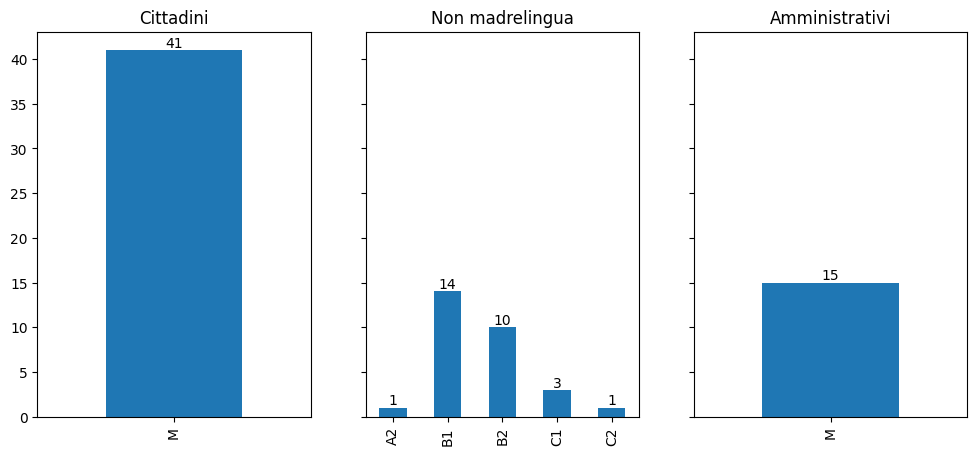

In [5]:
comparison_bar_plot(
    data_df[data_df['participant_type'] == 'REGULAR'].italian_knowledge,
    data_df[data_df['participant_type'] == 'FOREIGNER'].italian_knowledge,
    data_df[data_df['participant_type'] == 'ADMINISTRATIVE'].italian_knowledge,
)

# Age range

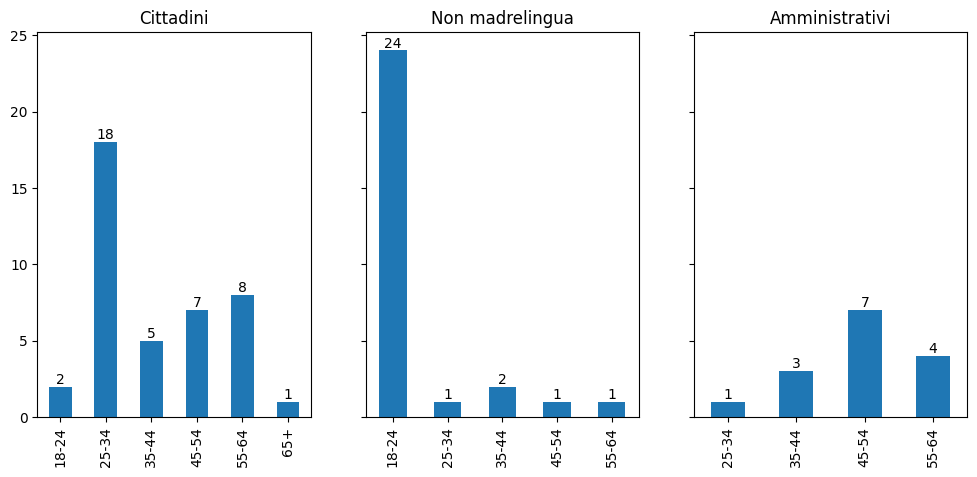

In [6]:
comparison_bar_plot(
    data_df[data_df['participant_type'] == 'REGULAR'].age_range,
    data_df[data_df['participant_type'] == 'FOREIGNER'].age_range,
    data_df[data_df['participant_type'] == 'ADMINISTRATIVE'].age_range,
)

# Education level

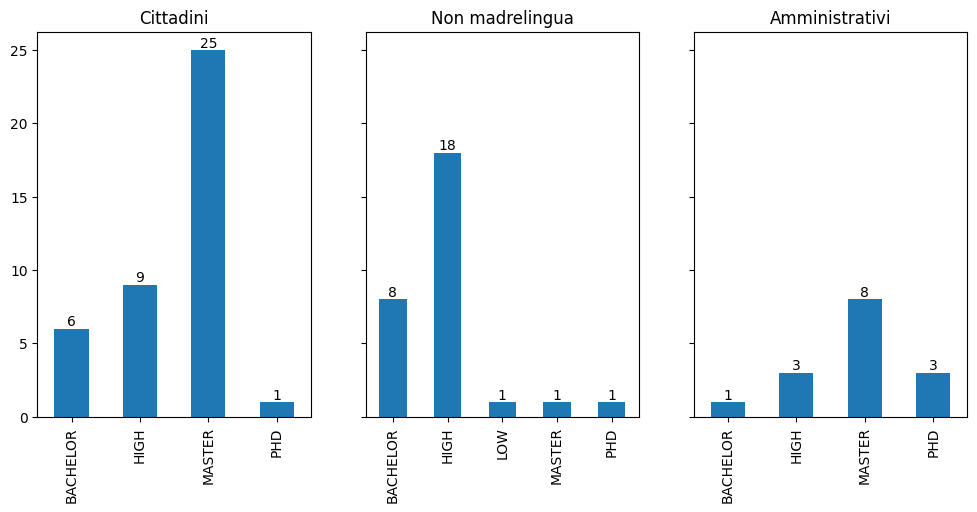

In [7]:
comparison_bar_plot(
    data_df[data_df['participant_type'] == 'REGULAR'].education_level,
    data_df[data_df['participant_type'] == 'FOREIGNER'].education_level,
    data_df[data_df['participant_type'] == 'ADMINISTRATIVE'].education_level,
)

# Education field

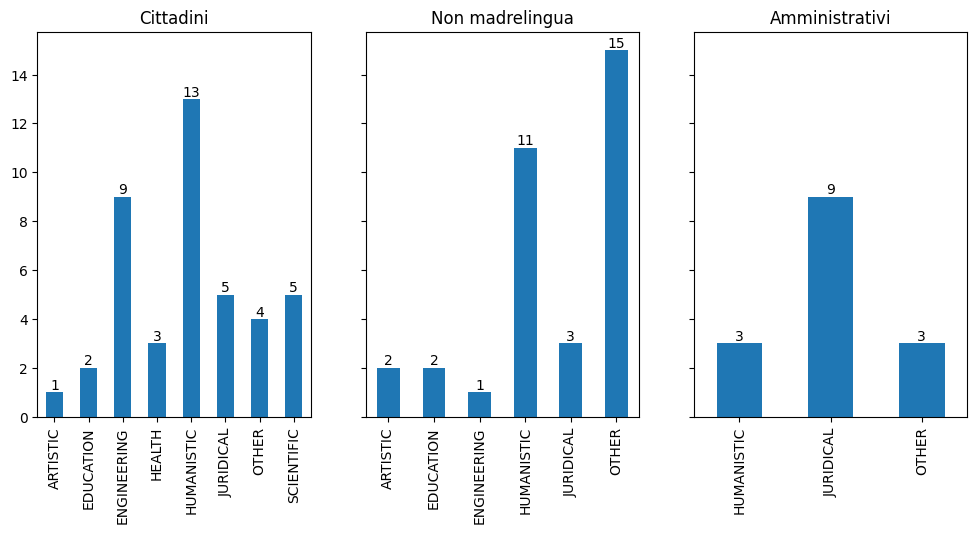

In [8]:
comparison_bar_plot(
  pd.Series([ne for e in data_df[data_df['participant_type'] == 'REGULAR'].education_fields.to_list() for ne in e.split(' | ')]),
  pd.Series([ne for e in data_df[data_df['participant_type'] == 'FOREIGNER'].education_fields.to_list() for ne in e.split(' | ')]),
  pd.Series([ne for e in data_df[data_df['participant_type'] == 'ADMINISTRATIVE'].education_fields.to_list() for ne in e.split(' | ')])
)

# Employment

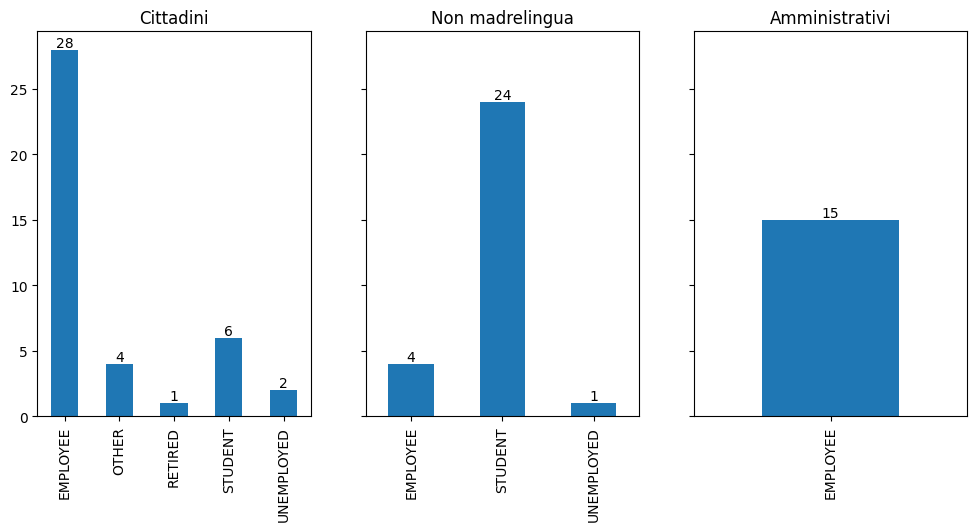

In [9]:
comparison_bar_plot(
    data_df[data_df['participant_type'] == 'REGULAR'].employment,
    data_df[data_df['participant_type'] == 'FOREIGNER'].employment,
    data_df[data_df['participant_type'] == 'ADMINISTRATIVE'].employment,
)

# Employment fields

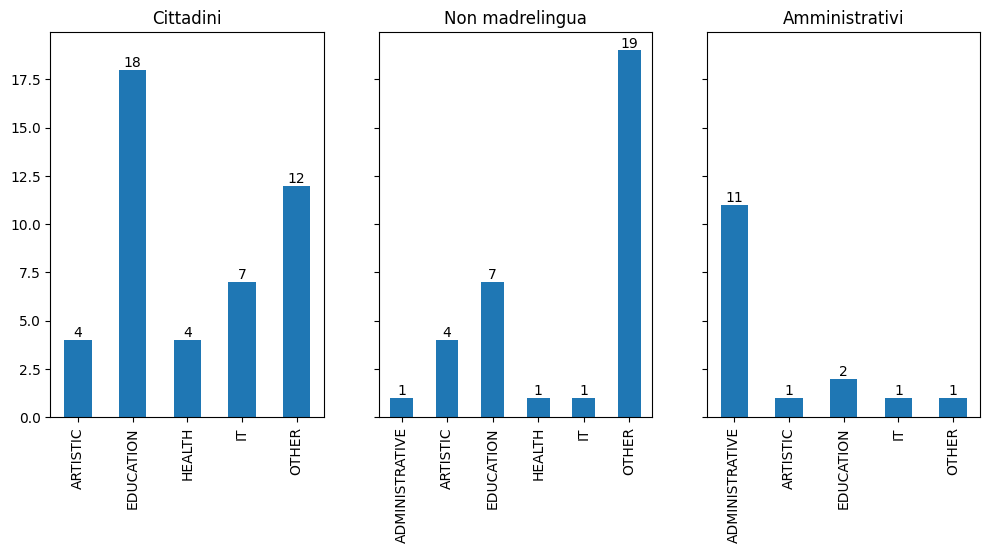

In [10]:
comparison_bar_plot(
  pd.Series([ne for e in data_df[data_df['participant_type'] == 'REGULAR'].employment_fields.to_list() for ne in e.split(' | ')]),
  pd.Series([ne for e in data_df[data_df['participant_type'] == 'FOREIGNER'].employment_fields.to_list() for ne in e.split(' | ')]),
  pd.Series([ne for e in data_df[data_df['participant_type'] == 'ADMINISTRATIVE'].employment_fields.to_list() for ne in e.split(' | ')])
)